In [1]:
#Necessary imports
import random
import numpy as np
import pygad

# **5 CITIES**

In [2]:
villes_5= [
    [0.0, 3.0, 4.0, 2.0, 7.0],
    [3.0, 0.0, 4.0, 6.0, 3.0],
    [4.0, 4.0, 0.0, 5.0, 8.0],
    [2.0, 6.0, 5.0, 0.0, 6.0],
    [7.0, 3.0, 8.0, 6.0, 0.0]
]

In [3]:
def fitness_5(solution, solution_idx):
    # Calculate the cost of the solution (distance)
    b = [0, 1, 2, 3, 4]
    for i in range(len(solution)):
            if np.count_nonzero(solution == solution[i]) > 1:
                for j in range(len(b)):
                    if b[j] not in solution:
                        solution[i] = b[j]
    for i in range(len(solution)-1):
        distance = np.sum(np.fromiter((villes_5[int(solution[i])][int(solution[i+1])] for i in range(len(solution)-1)), int))
    distance = distance + villes_5[int(solution[-1])][int(solution[0])]
    # Calculer the fitness
    fitness = 1 / (distance + 0.0001)

    return fitness


In [4]:
# Creation of a method that will allow us to track the different steps of the algorithm's execution.
last_fitness=0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

Catalog of options for parameter types: :
- **Selection :** "sss", "rws", "rank", "tournament", "sus"
- **Mutation :** "random", "scramble", "adaptive", "swap"
- **Crossover:** "single_point", "two_points", "uniform"

In [5]:
# Configuration of the genetic algorithm model and creation of the instance.

def TSP_5(fitness_fonction,selection_type,mutationType,croisement_type):
    ga_instance = pygad.GA(
    sol_per_pop=50,
    num_genes=5,
    gene_space={"low": 0, "high": 4},
    gene_type=int,
    num_generations=500,
    num_parents_mating=5,

    fitness_func=fitness_fonction,

    parent_selection_type=selection_type,

    mutation_type=mutationType,

    crossover_type=croisement_type,

    stop_criteria="saturate_50",
    on_generation=callback_generation)
    # We are replacing the np.float data type with np.float64 in order to avoid a version issue, as the roulette selection method has not been updated with the latest version of NumPy. This will ensure that our code runs smoothly and without errors when using the roulette selection method in our genetic algorithm.
    np_float64 = np.float64  
    np.float = np_float64
    
    return ga_instance

In [6]:
#Creating an instance
a1=TSP_5(fitness_5,"sus","scramble","two_points")
a1.summary()

----------------------------------------------------------------------
                           PyGAD Lifecycle                           
Step                Handler                                  Output Shape
Fitness Function    fitness_5()                              (1)    
----------------------------------------------------------------------
Parent Selection    stochastic_universal_selection()         (5, 5) 
Number of Parents: 5
----------------------------------------------------------------------
Crossover           two_points_crossover()                   (5, 5) 
----------------------------------------------------------------------
Mutation            scramble_mutation()                      (5, 5) 
Mutation Genes: 1
Random Mutation Range: (-1.0, 1.0)
Gene Space: {'low': 0, 'high': 4}
Mutation by Replacement: False
Allow Duplicated Genes: True
----------------------------------------------------------------------
On Generation       callback_generation()                

c:\Python311\Lib\site-packages\pygad\pygad.py:505: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


In [7]:
# Resetting the model's results (as it saves the results obtained during the last execution).
a1.solution = None
a1.run()

Generation = 1
Fitness    = 0.0526313019405161
Change     = 0.0526313019405161
Generation = 2
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 3
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 4
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 5
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 6
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 7
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 8
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 9
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 10
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 11
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 12
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 13
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 14
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 15
Fitness    = 0.0526313019405161
Change     = 0.0
Generation = 16
Fit

Parameters of the best solution : [2 0 3 4 1]
Fitness value of the best solution = 0.0526313019405161


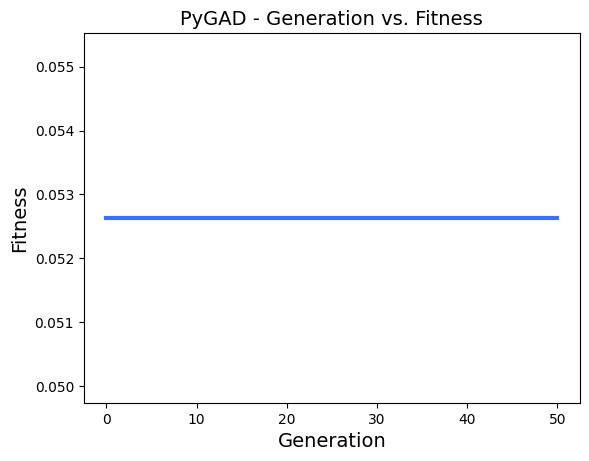

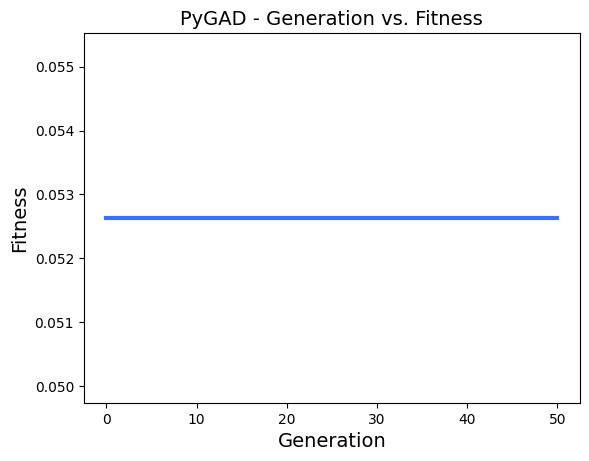

In [8]:
#Display and visualization of the results.
solution, solution_fitness, solution_idx = a1.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

a1.plot_fitness()

 # **15 CITIES**

In [9]:
villes_15 = [
    [0, 29, 82, 46, 68, 52, 72, 42, 51, 55, 29, 74, 23, 72, 46],
    [29, 0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11, 52, 21],
    [82, 55, 0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64, 31, 51],
    [46, 46, 68, 0, 82, 15, 72, 31, 62, 42, 21, 51, 51, 43, 64],
    [68, 42, 46, 82, 0, 74, 23, 52, 21, 46, 82, 58, 46, 65, 23],
    [52, 43, 55, 15, 74, 0, 61, 23, 55, 31, 33, 37, 51, 29, 59],
    [72, 43, 23, 72, 23, 61, 0, 42, 23, 31, 77, 37, 51, 46, 33],
    [42, 23, 43, 31, 52, 23, 42, 0, 33, 15, 37, 33, 33, 31, 37],
    [51, 23, 41, 62, 21, 55, 23, 33, 0, 29, 62, 46, 29, 51, 11],
    [55, 31, 29, 42, 46, 31, 31, 15, 29, 0, 51, 21, 41, 23, 37],
    [29, 41, 79, 21, 82, 33, 77, 37, 62, 51, 0, 65, 42, 59, 61],
    [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65, 0, 61, 11, 55],
    [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61, 0, 62, 23],
    [72, 52, 31, 43, 65, 29, 46, 31, 51, 23, 59, 11, 62, 0, 59],
    [46, 21, 51, 64, 23, 59, 33, 37, 11, 37, 61, 55, 23, 59, 0]
]

In [10]:
#List of intervals for a gene in our population.
gene_space2=[]
for i in range(15):
    gene_space2.append(i)
print(gene_space2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [11]:
def fitness_15(solution,solution_idx):
    
    #2. In case of repetition of the same gene, modify the solution
    for i in range(len(solution)):
        if np.count_nonzero(solution == solution[i]) > 1:
            for j in range(len(gene_space2)):
                if gene_space2[j] not in solution:
                    solution[i] = gene_space2[j]
                    break
            
    #3. Calculate the cost of the solution (distance)
    for i in range(len(solution)-1):
        distance = np.sum(np.fromiter((villes_15[int(solution[i])][int(solution[i+1])] for i in range(len(solution)-1)), int))
    distance = distance + villes_15[int(solution[-1])][int(solution[0])]

    #4. Calculate the fitness
    fitness = 1 / ((distance)+ 0.0001)

    return fitness


In [12]:
# Creation of a method to facilitate hyperparameter tuning
def TSP_15(fitness_fonction,selection_type,mutationType,croisement_type):
    ga_instance = pygad.GA(
    sol_per_pop=150,
    num_genes=len(gene_space2),
    gene_space={"low": min(gene_space2), "high": max(gene_space2)},
    gene_type=int,
    num_generations=1500,
    num_parents_mating=5,
    fitness_func=fitness_fonction,
    parent_selection_type=selection_type,
    mutation_type=mutationType,
    crossover_type=croisement_type,
    stop_criteria="saturate_50",
    #mutation_percent_genes=[10,40],
    on_generation=callback_generation)
    
    
    np_float64 = np.float64  
    np.float = np_float64
    
    return ga_instance

In [13]:
#Creating an instance
a=TSP_15(fitness_15,"sss","random","two_points")
a.summary()

----------------------------------------------------------------------
                           PyGAD Lifecycle                           
Step                   Handler                            Output Shape
Fitness Function       fitness_15()                       (1)      
----------------------------------------------------------------------
Parent Selection       steady_state_selection()           (5, 15)  
Number of Parents: 5
----------------------------------------------------------------------
Crossover              two_points_crossover()             (5, 15)  
----------------------------------------------------------------------
Mutation               random_mutation()                  (5, 15)  
Mutation Genes: 1
Random Mutation Range: (-1.0, 1.0)
Gene Space: {'low': 0, 'high': 14}
Mutation by Replacement: False
Allow Duplicated Genes: True
----------------------------------------------------------------------
On Generation          callback_generation()              None 

In [14]:
a.solution=None
a.run()

Generation = 1
Fitness    = 0.002232142358896795
Change     = -0.05039915958161931
Generation = 2
Fitness    = 0.0022988500462413687
Change     = 6.670768734457367e-05
Generation = 3
Fitness    = 0.002493764964148388
Change     = 0.00019491491790701952
Generation = 4
Fitness    = 0.00257069342655696
Change     = 7.692846240857192e-05
Generation = 5
Fitness    = 0.002688171320384054
Change     = 0.00011747789382709388
Generation = 6
Fitness    = 0.0027397252767875956
Change     = 5.155395640354162e-05
Generation = 7
Fitness    = 0.0027397252767875956
Change     = 0.0
Generation = 8
Fitness    = 0.0027397252767875956
Change     = 0.0
Generation = 9
Fitness    = 0.002770082335157248
Change     = 3.035705836965238e-05
Generation = 10
Fitness    = 0.002770082335157248
Change     = 0.0
Generation = 11
Fitness    = 0.002770082335157248
Change     = 0.0
Generation = 12
Fitness    = 0.002770082335157248
Change     = 0.0
Generation = 13
Fitness    = 0.002770082335157248
Change     = 0.0
Generati

Parameters of the best solution : [ 6  2  7 10  3  5 13 11  9  1  0 12 14  8  4]
Fitness value of the best solution = 0.002770082335157248


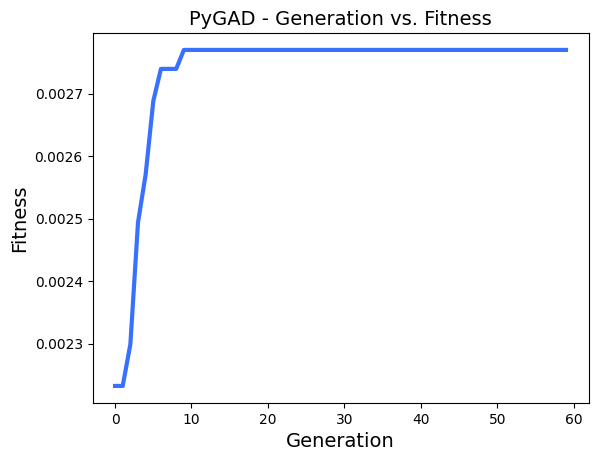

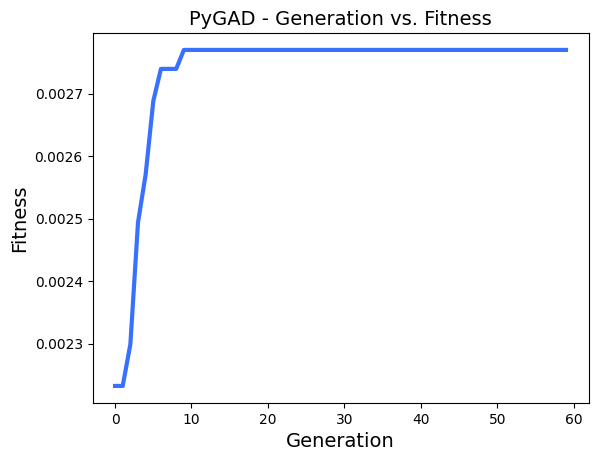

In [15]:
# Display and visualization of the results.
solution, solution_fitness, solution_idx = a.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
a.plot_fitness()

# **17 CITIES**

In [16]:
matrix_17=[[0, 633, 257, 91, 412, 150, 80, 134, 259, 505, 353, 324, 70, 211, 268, 246, 121],
             [633, 0, 390, 661, 227, 488, 572, 530, 555, 289, 282, 638, 567, 466, 420, 745, 518],
             [257, 390, 0, 228, 169, 112, 196, 154, 372, 262, 110, 437, 191, 74, 53, 472, 142],
             [91, 661, 228, 0, 383, 120, 77, 105, 175, 476, 324, 240, 27, 182, 239, 237, 84],
             [412, 227, 169, 383, 0, 267, 351, 309, 338, 196, 61, 421, 346, 243, 199, 528, 297],
             [150, 488, 112, 120, 267, 0, 63, 34, 264, 360, 208, 329, 83, 105, 123, 364, 35],
             [80, 572, 196, 77, 351, 63, 0, 29, 232, 444, 292, 297, 47, 150, 207, 332, 29],
             [134, 530, 154, 105, 309, 34, 29, 0, 249, 402, 250, 314, 68, 108, 165, 349, 36],
             [259, 555, 372, 175, 338, 264, 232, 249, 0, 495, 352, 95, 189, 326, 383, 202, 236],
             [505, 289, 262, 476, 196, 360, 444, 402, 495, 0, 154, 578, 439, 336, 240, 685, 390],
             [353, 282, 110, 324, 61, 208, 292, 250, 352, 154, 0, 435, 287, 184, 140, 542, 238],
             [324, 638, 437, 240, 421, 329, 297, 314, 95, 578, 435, 0, 254, 391, 448, 157, 301],
             [70, 567, 191, 27, 346, 83, 47, 68, 189, 439, 287, 254, 0, 145, 202, 289, 55],
             [211, 466, 74, 182, 243, 105, 150, 108, 326, 336, 184, 391, 145, 0, 57, 426, 96],
             [268, 420, 53, 239, 199, 123, 207, 165, 383, 240, 140, 448, 202, 57, 0, 483, 153],
             [246, 745, 472, 237, 528, 364, 332, 349, 202, 685, 542, 157, 289, 426, 483, 0, 336],
             [121, 518, 142, 84, 297, 35, 29, 36, 236, 390, 238, 301, 55, 96, 153, 336, 0]] 

In [17]:
#generating the gene_space 
gene_space3=[num for num in range(17)]
print(gene_space3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [18]:
def fitness_17(solution,solution_idx):
    #notre intervalle
    b = gene_space3
    #En cas de répétition du meme gene, modification de la solution
    for i in range(len(solution)):
        if np.count_nonzero(solution == solution[i]) > 1:
            for j in range(len(b)):
                if b[j] not in solution:
                    solution[i] = b[j]
                    break
            
    # Calculer le cout de la solution (distance)
    for i in range(len(solution)-1):
        distance = np.sum(np.fromiter((matrix_17[int(solution[i])][int(solution[i+1])] for i in range(len(solution)-1)), int))
    distance = distance + matrix_17[int(solution[-1])][int(solution[0])]
        # Calculer la fitness
    fitness = 1 / (distance + 0.0001)

    return fitness

In [19]:
# Création d'une methode pour faciliter l'ajustement de l'hyper-parametrage
def TSP_17(fitness_fonction,selection_type,mutationType,croisement_type):
    ga_instance = pygad.GA(
    sol_per_pop=170,
    num_genes=17,
    gene_space={"low": 0, "high": 16},
    gene_type=int,
    num_generations=1700,
    num_parents_mating=20,

    fitness_func=fitness_fonction,

    parent_selection_type=selection_type,

    mutation_type=mutationType,

    crossover_type=croisement_type,
    #mutation_percent_genes=[10,40],

    stop_criteria="saturate_50",
    on_generation=callback_generation)
    #on remplace np.float par np.float 64 pour éviter un probleme de verison car la methode de selection roulette n'a pas été mise à jour avec numpy
    np_float64 = np.float64  
    np.float = np_float64
    
    return ga_instance

In [20]:
d=TSP_17(fitness_17,"tournament","random","uniform")
d.solution=None
d.run()

Generation = 1
Fitness    = 0.00033670032536362536
Change     = -0.0024333820097936225
Generation = 2
Fitness    = 0.00033670032536362536
Change     = 0.0
Generation = 3
Fitness    = 0.00033670032536362536
Change     = 0.0
Generation = 4
Fitness    = 0.00033670032536362536
Change     = 0.0
Generation = 5
Fitness    = 0.00033670032536362536
Change     = 0.0
Generation = 6
Fitness    = 0.00033670032536362536
Change     = 0.0
Generation = 7
Fitness    = 0.00033670032536362536
Change     = 0.0
Generation = 8
Fitness    = 0.00033670032536362536
Change     = 0.0
Generation = 9
Fitness    = 0.00033670032536362536
Change     = 0.0
Generation = 10
Fitness    = 0.00033670032536362536
Change     = 0.0
Generation = 11
Fitness    = 0.00033670032536362536
Change     = 0.0
Generation = 12
Fitness    = 0.00033670032536362536
Change     = 0.0
Generation = 13
Fitness    = 0.00033670032536362536
Change     = 0.0
Generation = 14
Fitness    = 0.00033760971176199483
Change     = 9.093863983694649e-07
Genera

Parameters of the best solution : [ 7  5  2  4  1  9 10 14 13 16  0 15 11  8  3 12  6]
Fitness value of the best solution = 0.0004597700938036738


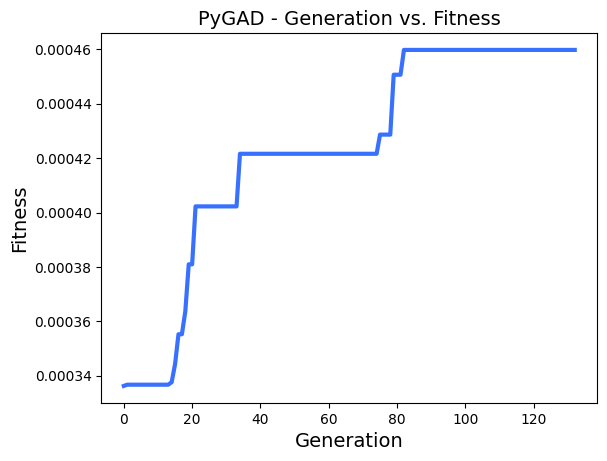

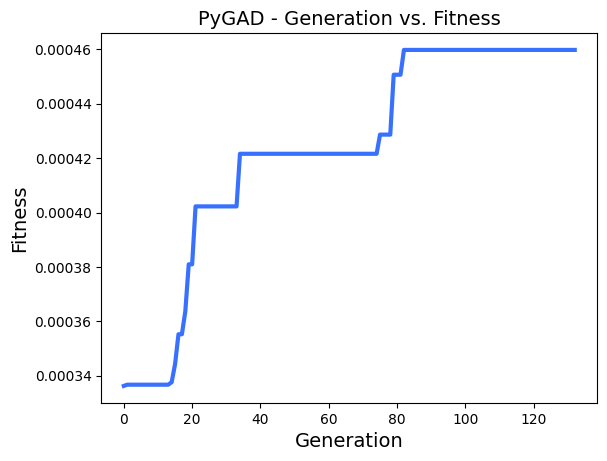

In [21]:
solution, solution_fitness, solution_idx = d.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
d.plot_fitness()

# **26 CITIES**

In [22]:
matrix_26=[[0, 83, 93, 129, 133, 139, 151, 169, 135, 114, 110, 98, 99, 95, 81, 152, 159, 181, 172, 185, 147, 157, 185, 220, 127, 181],
          [83, 0, 40, 53, 62, 64, 91, 116, 93, 84, 95, 98, 89, 68, 67, 127, 156, 175, 152, 165, 160, 180, 223, 268, 179, 197],
          [93, 40, 0, 42, 42, 49, 59, 81, 54, 44, 58, 64, 54, 31, 36, 86, 117, 135, 112, 125, 124, 147, 193, 241, 157, 161],
          [129, 53, 42, 0, 11, 11, 46, 72, 65, 70, 88, 100, 89, 66, 76, 102, 142, 156, 127, 139, 155, 180, 228, 278, 197, 190],
          [133, 62, 42, 11, 0, 9, 35, 61, 55, 62, 82, 95, 84, 62, 74, 93, 133, 146, 117, 128, 148, 173, 222, 272, 194, 182],
          [139, 64, 49, 11, 9, 0, 39, 65, 63, 71, 90, 103, 92, 71, 82, 100, 141, 153, 124, 135, 156, 181, 230, 280, 202, 190],
          [151, 91, 59, 46, 35, 39, 0, 26, 34, 52, 71, 88, 77, 63, 78, 66, 110, 119, 88, 98, 130, 156, 206, 257, 188, 160],
          [169, 116, 81, 72, 61, 65, 26, 0, 37, 59, 75, 92, 83, 76, 91, 54, 98, 103, 70, 78, 122, 148, 198, 250, 188, 148],
          [135, 93, 54, 65, 55, 63, 34, 37, 0, 22, 39, 56, 47, 40, 55, 37, 78, 91, 62, 74, 96, 122, 172, 223, 155, 128],
          [114, 84, 44, 70, 62, 71, 52, 59, 22, 0, 20, 36, 26, 20, 34, 43, 74, 91, 68, 82, 86, 111, 160, 210, 136, 121],
          [110, 95, 58, 88, 82, 90, 71, 75, 39, 20, 0, 18, 11, 27, 32, 42, 61, 80, 64, 77, 68, 92, 140, 190, 116, 103],
          [98, 98, 64, 100, 95, 103, 88, 92, 56, 36, 18, 0, 11, 34, 31, 56, 63, 85, 75, 87, 62, 83, 129, 178, 100, 99],
          [99, 89, 54, 89, 84, 92, 77, 83, 47, 26, 11, 11, 0, 23, 24, 53, 68, 89, 74, 87, 71, 93, 140, 189, 111, 107],
          [95, 68, 31, 66, 62, 71, 63, 76, 40, 20, 27, 34, 23, 0, 15, 62, 87, 106, 87, 100, 93, 116, 163, 212, 132, 130],
          [81, 67, 36, 76, 74, 82, 78, 91, 55, 34, 32, 31, 24, 15, 0, 73, 92, 112, 96, 109, 93, 113, 158, 205, 122, 130],
          [152, 127, 86, 102, 93, 100, 66, 54, 37, 43, 42, 56, 53, 62, 73, 0, 44, 54, 26, 39, 68, 94, 144, 196, 139, 95],
          [159, 156, 117, 142, 133, 141, 110, 98, 78, 74, 61, 63, 68, 87, 92, 44, 0, 22, 34, 38, 30, 53, 102, 154, 109, 51],
          [181, 175, 135, 156, 146, 153, 119, 103, 91, 91, 80, 85, 89, 106, 112, 54, 22, 0, 33, 29, 46, 64, 107, 157, 125, 51],
          [172, 152, 112, 127, 117, 124, 88, 70, 62, 68, 64, 75, 74, 87, 96, 26, 34, 33, 0, 13, 63, 87, 135, 186, 141, 81],
          [185, 165, 125, 139, 128, 135, 98, 78, 74, 82, 77, 87, 87, 100, 109, 39, 38, 29, 13, 0, 68, 90, 136, 186, 148, 79],
          [147, 160, 124, 155, 148, 156, 130, 122, 96, 86, 68, 62, 71, 93, 93, 68, 30, 46, 63, 68, 0, 26, 77, 128, 80, 37],
          [157, 180, 147, 180, 173, 181, 156, 148, 122, 111, 92, 83, 93, 116, 113, 94, 53, 64, 87, 90, 26, 0, 50, 102, 65, 27],
          [185, 223, 193, 228, 222, 230, 206, 198, 172, 160, 140, 129, 140, 163, 158, 144, 102, 107, 135, 136, 77, 50, 0, 51, 64, 58],
          [220, 268, 241, 278, 272, 280, 257, 250, 223, 210, 190, 178, 189, 212, 205, 196, 154, 157, 186, 186, 128, 102, 51, 0, 93, 107],
          [127, 179, 157, 197, 194, 202, 188, 188, 155, 136, 116, 100, 111, 132, 122, 139, 109, 125, 141, 148, 80, 65, 64, 93, 0, 90],
          [181, 197, 161, 190, 182, 190, 160, 148, 128, 121, 103, 99, 107, 130, 130, 95, 51, 51, 81, 79, 37, 27, 58, 107, 90, 0]]

In [23]:
gene_space4=[num for num in range(26)]
print(gene_space4)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [24]:
def fitness_26(solution,solution_idx):
    
    b = gene_space4
    
    for i in range(len(solution)):
        if np.count_nonzero(solution == solution[i]) > 1:
            for j in range(len(b)):
                if b[j] not in solution:
                    solution[i] = b[j]
                    break
            
    
    for i in range(len(solution)-1):
        distance = np.sum(np.fromiter((matrix_26[int(solution[i])][int(solution[i+1])] for i in range(len(solution)-1)), int))
    distance = distance + matrix_26[int(solution[-1])][int(solution[0])]
        
    fitness = 1 / (distance + 0.0001)

    return fitness

In [25]:
def TSP_26(fitness_fonction,selection_type,mutationType,croisement_type):
    ga_instance = pygad.GA(
    sol_per_pop=50,
    num_genes=26,
    gene_space={"low": 0, "high": 25},
    gene_type=int,
    num_generations=1000,
    num_parents_mating=20,

    fitness_func=fitness_fonction,

    parent_selection_type=selection_type,

    mutation_type=mutationType,

    crossover_type=croisement_type,

    #mutation_percent_genes=[10,40],
    stop_criteria="saturate_50",
    on_generation=callback_generation)
    
    np_float64 = np.float64  
    np.float = np_float64
    
    return ga_instance


In [26]:
f=TSP_26(fitness_26,"tournament","random","two_points")
#Sommaire du modele 
f.summary()


----------------------------------------------------------------------
                           PyGAD Lifecycle                           
Step                   Handler                         Output Shape
Fitness Function       fitness_26()                    (1)        
----------------------------------------------------------------------
Parent Selection       tournament_selection()          (20, 26)   
Number of Parents: 20
K Tournament: 3
----------------------------------------------------------------------
Crossover              two_points_crossover()          (20, 26)   
----------------------------------------------------------------------
Mutation               random_mutation()               (20, 26)   
Mutation Genes: 2
Random Mutation Range: (-1.0, 1.0)
Gene Space: {'low': 0, 'high': 25}
Mutation by Replacement: False
Allow Duplicated Genes: True
----------------------------------------------------------------------
On Generation          callback_generation()         

In [27]:
f.solution=None
f.run()

Generation = 1
Fitness    = 0.0005296609888950747
Change     = 6.989089509140092e-05
Generation = 2
Fitness    = 0.0005506607626288127
Change     = 2.0999773733737948e-05
Generation = 3
Fitness    = 0.0005995203477505786
Change     = 4.885958512176598e-05
Generation = 4
Fitness    = 0.0005998799880095988
Change     = 3.5964025902018686e-07
Generation = 5
Fitness    = 0.0006784260055341923
Change     = 7.854601752459351e-05
Generation = 6
Fitness    = 0.0006784260055341923
Change     = 0.0
Generation = 7
Fitness    = 0.0006784260055341923
Change     = 0.0
Generation = 8
Fitness    = 0.0006784260055341923
Change     = 0.0
Generation = 9
Fitness    = 0.0007032348309961441
Change     = 2.48088254619518e-05
Generation = 10
Fitness    = 0.0007032348309961441
Change     = 0.0
Generation = 11
Fitness    = 0.0007032348309961441
Change     = 0.0
Generation = 12
Fitness    = 0.0007032348309961441
Change     = 0.0
Generation = 13
Fitness    = 0.0007032348309961441
Change     = 0.0
Generation = 14


Parameters of the best solution : [ 0  1  2  3  5  4  6  7  8  9 15 18 19 16 17 25 22 23 24 21 20 10 11 12
 13 14]
Fitness value of the best solution = 0.0009930485607697556


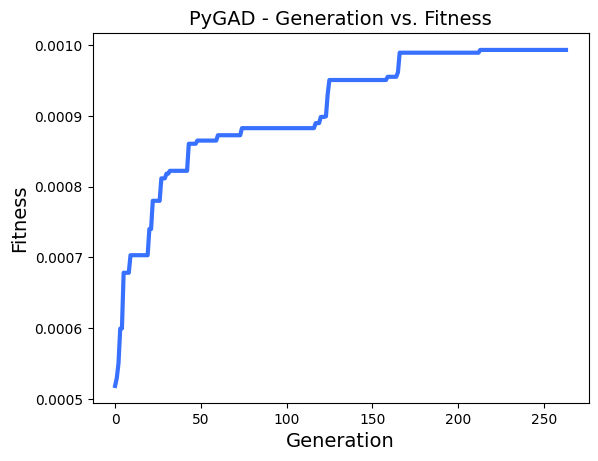

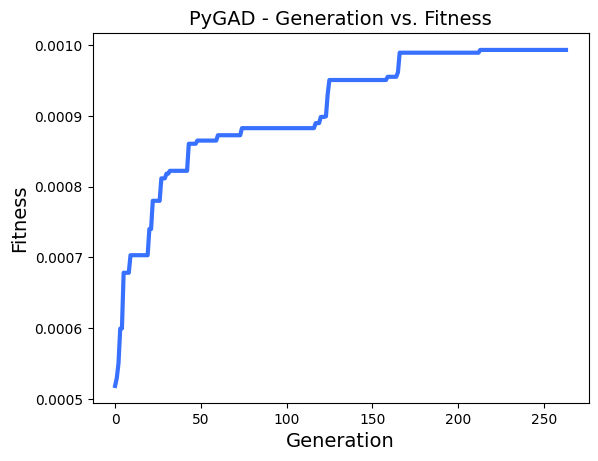

In [28]:
solution, solution_fitness, solution_idx = f.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
f.plot_fitness()

In [29]:
# Example of generating our own initial population
"""population1=[[12, 15, 11, 6, 9, 2, 16, 10, 1, 14, 5, 7, 8, 0, 3, 13, 4],
[0, 11, 12, 1, 9, 16, 10, 2, 8, 7, 4, 14, 5, 6, 3, 15, 13],
[1, 2, 9, 16, 7, 10, 15, 11, 14, 13, 0, 4, 3, 8, 6, 12, 5],
[3, 6, 1, 2, 10, 14, 11, 9, 16, 8, 4, 15, 5, 7, 13, 12, 0],
[14, 4, 12, 7, 1, 16, 5, 2, 13, 0, 11, 6, 9, 8, 3, 10, 15],
[0, 7, 3, 16, 14, 6, 8, 9, 1, 12, 4, 13, 15, 11, 10, 2, 5],
[5, 2, 12, 7, 1, 13, 15, 16, 4, 0, 9, 8, 14, 3, 11, 10, 6],
[10, 9, 7, 6, 3, 12, 8, 15, 13, 4, 14, 16, 1, 2, 11, 0, 5],
[16, 4, 13, 5, 3, 12, 11, 8, 7, 14, 10, 1, 0, 6, 15, 2, 9],
[8, 12, 2, 9, 0, 14, 16, 15, 5, 3, 11, 4, 10, 13, 7, 6, 1],
[10, 4, 16, 9, 6, 0, 2, 12, 7, 14, 13, 3, 1, 8, 15, 5, 11],
[8, 11, 2, 0, 4, 6, 7, 9, 5, 16, 15, 3, 14, 12, 1, 10, 13],
[6, 2, 8, 11, 16, 14, 3, 5, 7, 15, 10, 9, 12, 1, 0, 13, 4],
[1, 3, 9, 15, 2, 7, 4, 8, 5, 16, 0, 10, 11, 14, 6, 13, 12],
[0, 13, 10, 7, 3, 6, 9, 1, 16, 4, 11, 14, 15, 8, 12, 5, 2],
[3, 11, 16, 6, 4, 15, 9, 10, 5, 12, 0, 2, 14, 1, 8, 13, 7],
[0, 8, 1, 14, 6, 13, 15, 4, 16, 3, 2, 9, 10, 5, 11, 12, 7],
[6, 12, 13, 14, 7, 11, 3, 2, 8, 0, 15, 10, 16, 5, 9, 1, 4],
[1, 5, 11, 13, 8, 4, 2, 12, 16, 3, 10, 15, 0, 14, 6, 9, 7],
[9, 8, 6, 3, 15, 7, 4, 1, 0, 14, 11, 16, 13, 10, 2, 12, 5]
]



list1=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
i=0
population=[]
while i!=20:
    random.shuffle(list1)
    a=list1
    print(a)
    population.insert(i,a)
    i=i+1
"""

'population1=[[12, 15, 11, 6, 9, 2, 16, 10, 1, 14, 5, 7, 8, 0, 3, 13, 4],\n[0, 11, 12, 1, 9, 16, 10, 2, 8, 7, 4, 14, 5, 6, 3, 15, 13],\n[1, 2, 9, 16, 7, 10, 15, 11, 14, 13, 0, 4, 3, 8, 6, 12, 5],\n[3, 6, 1, 2, 10, 14, 11, 9, 16, 8, 4, 15, 5, 7, 13, 12, 0],\n[14, 4, 12, 7, 1, 16, 5, 2, 13, 0, 11, 6, 9, 8, 3, 10, 15],\n[0, 7, 3, 16, 14, 6, 8, 9, 1, 12, 4, 13, 15, 11, 10, 2, 5],\n[5, 2, 12, 7, 1, 13, 15, 16, 4, 0, 9, 8, 14, 3, 11, 10, 6],\n[10, 9, 7, 6, 3, 12, 8, 15, 13, 4, 14, 16, 1, 2, 11, 0, 5],\n[16, 4, 13, 5, 3, 12, 11, 8, 7, 14, 10, 1, 0, 6, 15, 2, 9],\n[8, 12, 2, 9, 0, 14, 16, 15, 5, 3, 11, 4, 10, 13, 7, 6, 1],\n[10, 4, 16, 9, 6, 0, 2, 12, 7, 14, 13, 3, 1, 8, 15, 5, 11],\n[8, 11, 2, 0, 4, 6, 7, 9, 5, 16, 15, 3, 14, 12, 1, 10, 13],\n[6, 2, 8, 11, 16, 14, 3, 5, 7, 15, 10, 9, 12, 1, 0, 13, 4],\n[1, 3, 9, 15, 2, 7, 4, 8, 5, 16, 0, 10, 11, 14, 6, 13, 12],\n[0, 13, 10, 7, 3, 6, 9, 1, 16, 4, 11, 14, 15, 8, 12, 5, 2],\n[3, 11, 16, 6, 4, 15, 9, 10, 5, 12, 0, 2, 14, 1, 8, 13, 7],\n[0, 8, 1, 